In [2]:
print "Loading libraries, processed dataset and functions"
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

processed = pd.read_csv("../data/processed/processed.csv")
def agg_attrs_by_month(attr_dict, return_raw=False):
    df = processed
    for attr in attr_dict:
        df = df[df[attr] == attr_dict[attr]]
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by=['Date']).dropna()
    df = df.set_index('Date')
    df.groupby(pd.Grouper(freq="M"))
    sum = df.groupby(pd.Grouper(freq="M")).sum()
    data = list(sum['Order_Demand'])
    dates = list(sum.index)
    if return_raw is True:
        return sum['Order_Demand'], dates
    return data, dates


Loading libraries, processed dataset and functions


polynomial intercept: [2431.53054786], polynomial coef: [[ 0.00000000e+00 -6.57362839e+01  3.91504265e+00 -6.64935910e-02
   4.13670058e-04 -6.01654023e-07]]


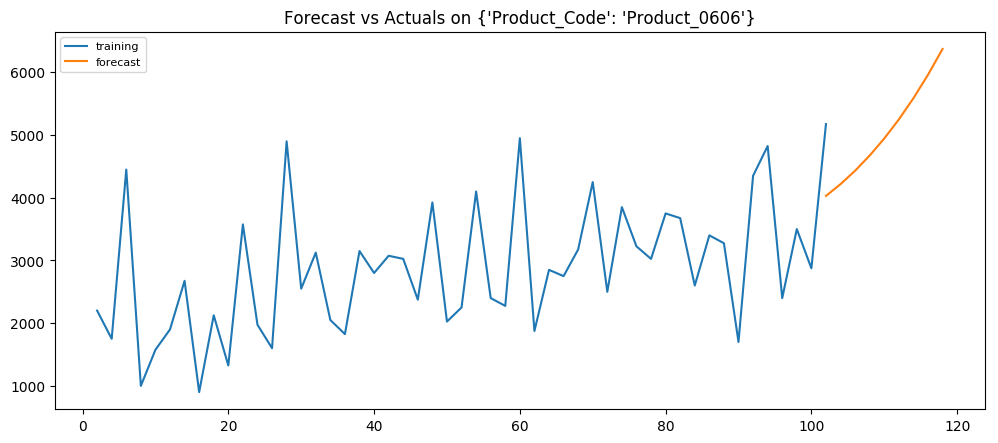

In [54]:
def train_poly_regression_n_predict(attr_dict, degree=5):
    df, dates = agg_attrs_by_month(attr_dict, return_raw=True)

    index_p85 = int(len(df.index) * 0.85)
    train = df[:index_p85]
    test = df[index_p85:]

    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    X_train = [[x * 2] for x in range(1, len(train.index) + 1)]
    Y_train = [[y] for y in train]
    X_poly = poly_features.fit_transform(X_train)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, Y_train)
    print "polynomial intercept: {}, polynomial coef: {}".format(lin_reg.intercept_, lin_reg.coef_)
    X_test = [[x * 2] for x in range(len(train.index), len(train.index) + len(test.index))]
    X_poly_test = poly_features.fit_transform(X_test)
    y_pred = lin_reg.predict(X_poly_test)


    plt.figure(figsize=(12, 5), dpi=100)
    plt.plot(X_train, Y_train, label='training')
    
    #plt.plot(test, label='actual')
    plt.plot(X_test, y_pred, label='forecast')
    plt.title('Forecast vs Actuals on {}'.format(attr_dict))
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

#train_poly_regression_n_predict({'Product_Code': 'Product_0458', 'Warehouse': 'Whse_S'})
train_poly_regression_n_predict({'Product_Code': 'Product_0606'})

polynomial intercept: [24391329.07040266], polynomial coef: [[ 0.00000000e+00  1.63003878e+06 -2.41988600e+04  1.11356819e+02]]


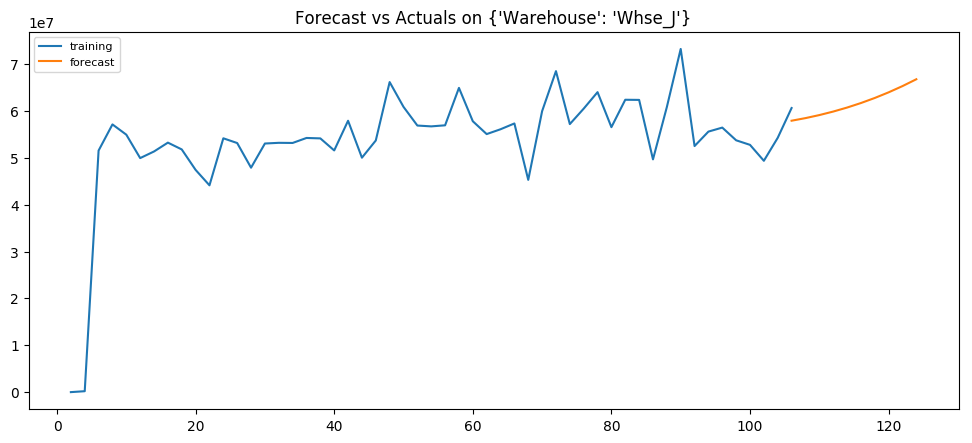

In [64]:
train_poly_regression_n_predict({'Warehouse': 'Whse_J'}, 3)